# Convolutional Neural Networks

# Importar Librerías

In [ ]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU
from tensorflow.keras.optimizers import SGD


# Cargar set de Imágenes

In [24]:
dirname = os.path.join(os.getcwd(),'./desastres')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

<>:14: SyntaxWarning: invalid escape sequence '\.'
<>:14: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Johann Israel\AppData\Local\Temp\ipykernel_16288\1317471098.py:14: SyntaxWarning: invalid escape sequence '\.'
  if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):


leyendo imagenes de  c:\Users\Johann Israel\Documents\ITM\Semestre 9\IA\CNN\./desastres\
c:\Users\Johann Israel\Documents\ITM\Semestre 9\IA\CNN\./desastres\asalto 1
c:\Users\Johann Israel\Documents\ITM\Semestre 9\IA\CNN\./desastres\incendio 7697
c:\Users\Johann Israel\Documents\ITM\Semestre 9\IA\CNN\./desastres\inundacion 11326
c:\Users\Johann Israel\Documents\ITM\Semestre 9\IA\CNN\./desastres\robo 13153
c:\Users\Johann Israel\Documents\ITM\Semestre 9\IA\CNN\./desastres\tornado 8765
Directorios leidos: 5
Imagenes en cada directorio [7698, 11326, 13153, 8765, 13178]
suma Total de imagenes en subdirs: 54120


# Creamos las etiquetas

In [25]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  54120


In [26]:
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

0 asalto
1 incendio
2 inundacion
3 robo
4 tornado


In [27]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [28]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (43296, 28, 28, 3) (43296,)
Testing data shape :  (10824, 28, 28, 3) (10824,)


Text(0.5, 1.0, 'Ground Truth : 4')

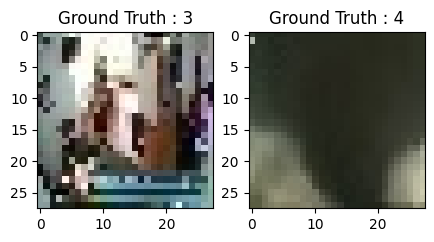

In [29]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

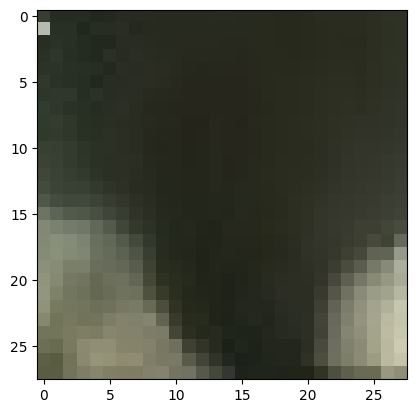

In [30]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [31]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 3
After conversion to one-hot: [0. 0. 0. 1. 0.]


# Creamos el Set de Entrenamiento y Validación

In [32]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [33]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(34636, 28, 28, 3) (8660, 28, 28, 3) (34636, 5) (8660, 5)


# Creamos el modelo de CNN

In [34]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [35]:
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))


sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

In [36]:
sport_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │       200,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,797 (788.27 KB)

 Trainable params: 201,797 (788.27 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

sport_model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),
    metrics=['accuracy']
)

# Entrenamos el modelo: Aprende a clasificar imágenes

In [38]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
# sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

sport_train = sport_model.fit(
    train_X, train_label,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(valid_X, valid_label)
)

Epoch 1/20
542/542 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.2892 - loss: 1.5708 - val_accuracy: 0.5770 - val_loss: 1.3366
Epoch 2/20
542/542 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.4782 - loss: 1.3471 - val_accuracy: 0.7139 - val_loss: 1.0318
Epoch 3/20
542/542 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.5882 - loss: 1.1232 - val_accuracy: 0.7697 - val_loss: 0.8445
Epoch 4/20
542/542 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.6419 - loss: 0.9817 - val_accuracy: 0.8117 - val_loss: 0.7271
Epoch 5/20
542/542 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.6825 - loss: 0.8877 - val_accuracy: 0.8188 - val_loss: 0.6694
Epoch 6/20
542/542 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7139 - loss: 0.8232 - val_accuracy: 0.8365 - val_loss: 0.6083
Epoch 7/20
542/542 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7300 - loss: 0.7744 - val_accuracy: 0.8554 - val_loss: 0.5642
Epoch 8/20
542/542 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7476 - loss: 0.7312 - val_acc

In [39]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.save("riesgos.h5")

# Evaluamos la red

In [40]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9099 - loss: 0.3212


In [41]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.30899477005004883
Test accuracy: 0.9188839793205261


In [42]:
sport_train.history

{'accuracy': [0.349376380443573,
  0.5101916790008545,
  0.6046310067176819,
  0.656195878982544,
  0.6849809288978577,
  0.7187608480453491,
  0.7374985814094543,
  0.7546194791793823,
  0.7682180404663086,
  0.7826538681983948,
  0.7962235808372498,
  0.8047118782997131,
  0.8156542181968689,
  0.8251819014549255,
  0.8280401825904846,
  0.8347672820091248,
  0.8417253494262695,
  0.8480482697486877,
  0.852927565574646,
  0.8550640940666199],
 'loss': [1.5085272789001465,
  1.287968397140503,
  1.082547664642334,
  0.9506993293762207,
  0.879314661026001,
  0.8087459802627563,
  0.7619295716285706,
  0.7214499115943909,
  0.6887227296829224,
  0.6511387825012207,
  0.6270702481269836,
  0.6065001487731934,
  0.581122100353241,
  0.5599977374076843,
  0.5441093444824219,
  0.5236167311668396,
  0.5074527263641357,
  0.49085190892219543,
  0.48223578929901123,
  0.46998628973960876],
 'val_accuracy': [0.5770207643508911,
  0.7138568162918091,
  0.769745945930481,
  0.8116627931594849,

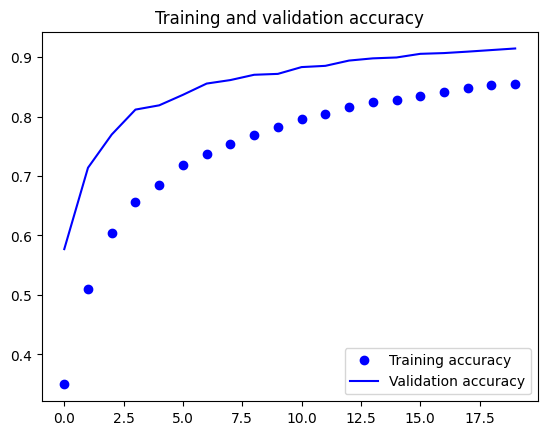

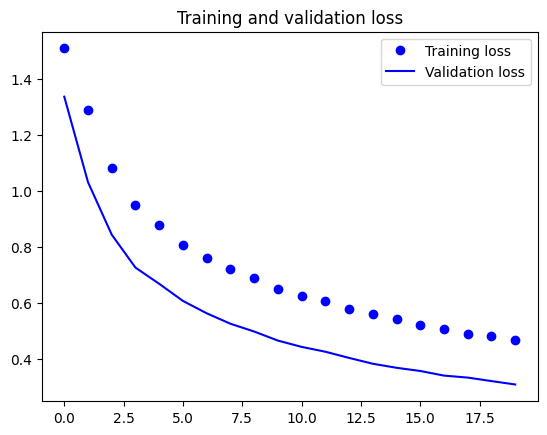

In [43]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [44]:
predicted_classes2 = sport_model.predict(test_X)

339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [45]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [46]:
predicted_classes.shape, test_Y.shape

((10824,), (10824,))

# Aprendamos de los errores: Qué mejorar

Found 9946 correct labels


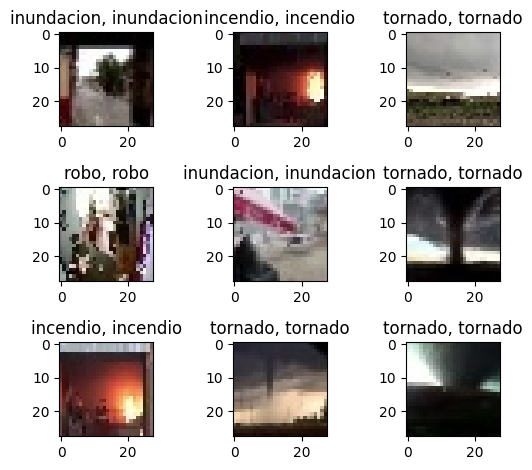

In [48]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[correct]],
                                                    deportes[test_Y[correct]]))

    plt.tight_layout()

Found 878 incorrect labels


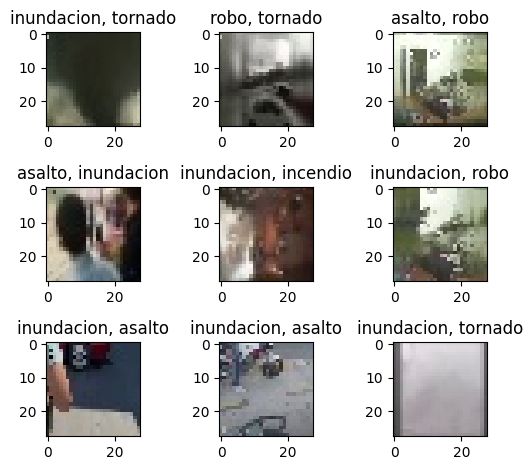

In [50]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                                                    deportes[test_Y[incorrect]]))
    plt.tight_layout()

In [51]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.95      0.82      0.88      1512
     Class 1       0.98      0.98      0.98      2298
     Class 2       0.81      0.93      0.86      2607
     Class 3       0.96      0.94      0.95      1716
     Class 4       0.95      0.90      0.92      2691

    accuracy                           0.92     10824
   macro avg       0.93      0.91      0.92     10824
weighted avg       0.92      0.92      0.92     10824



# Código para cargar el .h5

In [68]:
from skimage.transform import resize
import cv2 as cv

images=[]

# filenames = ['pruebas/asaltos/asalto5.jpg']
# filenames = ['pruebas/robo_casa/robocasa6.jpg']
# filenames = ['pruebas/incendios/incendio1.jpg']
# filenames = ['pruebas/inundaciones/inundacion2.jpg']
# filenames = ['pruebas/tornados/tornado3.jpg']

resultado = " "
frame = cv.imread(filenames[0])

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (28, 28),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = sport_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], deportes[img_tagged.tolist().index(max(img_tagged))])
    resultado = deportes[img_tagged.tolist().index(max(img_tagged))]
    
print(resultado)
    
cv.imshow("La situacion de riesgo es:    -"+resultado, frame)
cv.waitKey(0)
cv.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
pruebas/inundaciones/inundacion2.jpg inundacion
inundacion
